# **Laboratorio #2 - Modulacion por Amplitud**

## TAREA # 1 

**Construir un sistema básico AM de tipo DSC-SC, incluyendo la etapa de modulación y demodulación, puede asumir condiciones óptimas, esto es no ruido o pérdidas o modificaciones en frecuencia o fase.**









 



#### 1. Se recomienda crear una función para la modulación y otra para la demodulación. 

Se importan las librerias y funciones que serán necesarias. Asimismo, se crea un funcion que crea señales cosenoidales con amplitud, frecuencia, fase y offset variables. Tambien se define la cantidad de puntos y el lapso en el cual se graficarán las funciones en el tiempo, y con esto se define el eje x, tiempo, para la graficacion de señales.
Se crea la señal moduladora, una señal cosenoidal con una amplitud de 1.5, frecuencia de 60 Hz y offset de 2.

Para graficar en el dominio de la frecuencia se debe poder realizar la transformada rapida de Fourier (FFT), para esto se crea una funcion que realiza la FFT y grafica el resultado. Esta funcion toma la señal de entrada, un limite para graficar en la frecuencia y cada cuanto dibuja una division sobre el eje x.
Ahora se procede a graficar en la frecuencia la señal moduladora.
Se crea la señal portadora, una señal senoidal de amplitud 1 y frecuencia de 300 Hz.
Se procede a graficar la señal portadora en el domino de la frecuencia.

In [1]:
#Bibliotecas y funciones
#Se importan las bibliotecas mas importantes
import matplotlib.pyplot as plt
import numpy
from numpy import arange,sin,cos,pi, linspace
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz

#Definicion de funciones a utilizar
#Funcion para crear una señal cosenoidal
def cosenoidal(f,A,Offset=0, Theta=0):
    m = A*cos(2*pi*f*t + Theta) + Offset
    return m

#Funcion para realizar un FFT de una señal
def plotfft(func):
    F = fft(func)
    tf = fftfreq(samples, T/samples)
    return tf,F

#Funciones para filtro basa bajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

#Funcion de modulación AM DSB-SC
def AMSC(m,c):
    s = m*c
    return s

#Funcion de desmodulacionAM DSB-SC
def DemAMSC(s,c):
    sc = s*c
    return sc

#Funcion de modulación AM DSB-LC
def AMLC(m,c,ka):
    s = (1 + ka*m)*c
    return s

#### 2. Utilice sincronización coherente. 






#### 3. Puede asumir un canal óptimo sin pérdidas entre ambos bloques. 

#### 4. Grafique todas las funciones y salidas involucradas, tanto en el tiempo como en la frecuencia. Sea ordenado en la forma en que lo presente en la notebook. Describa lo que observa en cada una de ellas. 

#### 5. Para el experimento, considere una señal de tono (información) tipo: 𝑚(𝑡) ó 𝑓(𝑡) = cos (2𝜋𝑓t), de forma que NO se incurra en sobre-modulación.

Se crean y se grafican las diferentes señales que van a ser utilizadas, iniciando con la moduladora, esta se define con una frecuencia de 60 Hz, una amplitud de 1.5 y un offset de 2 para evitar sobremodulacion, y la portadora con una frecuencia de 300 Hz y amplitud de 1. A su vez se les calucula la FFT y se grafican las funciones tanto en el dominio del tiempo como en el dominio de la frecuencia.

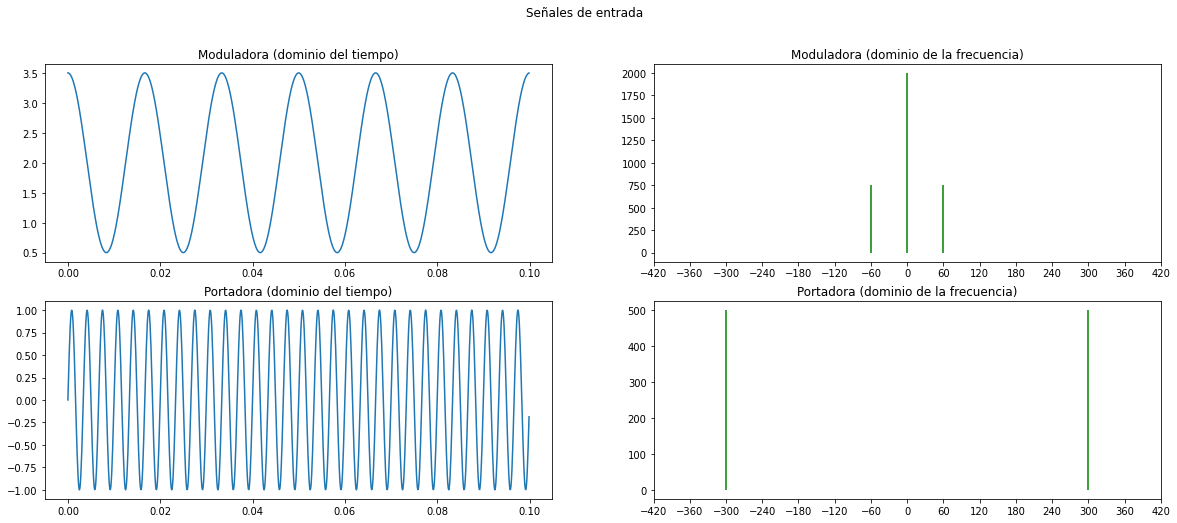

In [2]:
#Señales de entrada

#Numero de puntos y duracion
samples = 1000 
T = 0.1

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)

#Señales iniciales:
#Moduladora
#Frecuencia de 60Hz, Amplitud de 1.5 y Offset de 2
fm = 60
Am = 1.5
Offm = 2
m = cosenoidal(fm,Am,Offm)
Mtf, M = plotfft(m)

#Protadora
#Frecuencia de 300Hz y Amplitud de 1
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)

#Plot de las señales de entrada
fig1, axs = plt.subplots(2,2,figsize=(20,8))
fig1.suptitle('Señales de entrada')
axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,1].set(xlim=(-100,100),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')
axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,1].set(xlim=(-400,400),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')
plt.show()

Se observa que la señal moduladora al ser cosenoidal, el dominio de la frecuencia se representa por dos impulsos en la frecuencia de prueba ±60 Hz, y otro impulso en 0 Hz que representa el offset. De igual forma, la portadora se observa como un unico pulso a la frecuencia de modulacion ±300 Hz.

Para realizar la modulacion AM DSB-SC se creó una funcion que toma como entrada la señal moduladora y la señal portadora, las multiplica y devuelve el resultado, incluyendo la señal modulada y las envolventes. Como sabemos, la modulacion consiste en la multiplicacion de la señal moduladora por la señal portadora. Se procede a modular la señal moduladora definida anteriormente, utilizando la señal portadora. Asimismo se grafican las señales, modulada y envolventes, superior e inferior, en el domino del tiempo y la frecuencia.

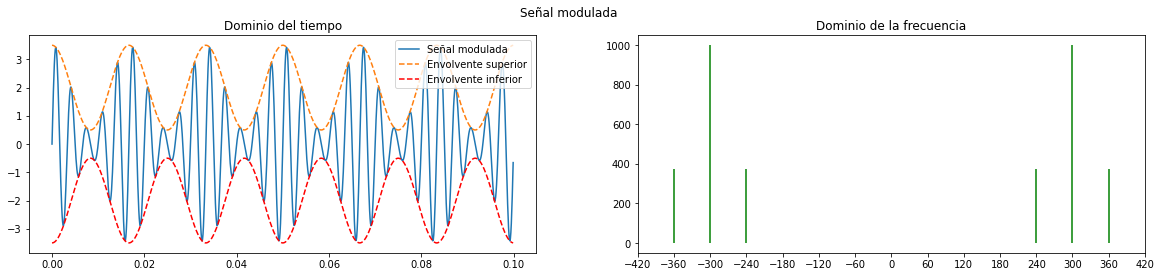

In [3]:
#Modulación de AM DSB-SC, señal modulada s

#Señal modulada
s = AMSC(m,c)
Stf, S = plotfft(s)

#Plot de la señal modulada
fig2, axs = plt.subplots(1,2,figsize=(20,4))
fig2.suptitle('Señal modulada')
axs[0].plot(t,s)
axs[0].plot(t,m,'--')
axs[0].plot(t,-m, '--' , color='r')
axs[0].legend(["Señal modulada", "Envolvente superior", "Envolvente inferior"])
axs[0].set_title('Dominio del tiempo')
#axs[0].grid()
axs[1].set(xlim=(-100,100),xticks=(range(-420,480,60)))
axs[1].vlines(Stf,0,numpy.abs(S),color='g')
axs[1].set_title('Dominio de la frecuencia')
#axs[1].grid()
plt.show()


Se aprecia, como en el dominio de la frecuencia, la señal moduladora se duplica y se centra en la frecuencia de la señal portadora, producto de la modulacion. Por otro lado, en el domino del tiempo se observa como la señal moduladora sigue el comportamiento de una señal envolvente, esta señal envolvente es igual a la señal moduladora para la envolvente superior, y a la señal moduladora invertida para la envolvente inferior.

Para la desmodulacion se creó una funcion, la cual recibe 2 señales, la señal modulada y la señal portadora para desmodulacion. Esta funcion desmodula la señal modulada y devuelve el resultado. Similar a la modulacion, la desmodulacion consiste en multiplicar dos señales, la señal modulada y la señal portadora para desmodulacion, en este caso igual a la señal portadora para modulacion.

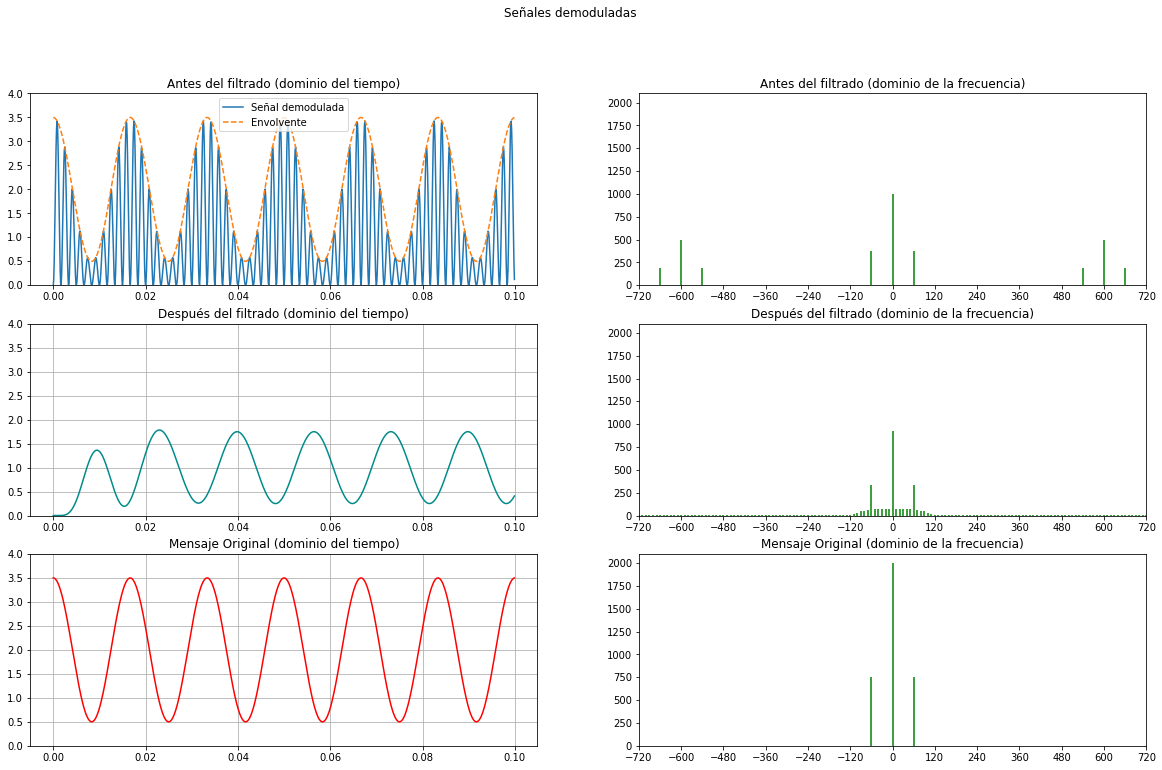

In [4]:
#Desmodulación de AM DSB-SC, señal demodulada sc

#Señal desmodulada
sc = DemAMSC(s,c)
SCtf, SC = plotfft(sc)

#Señal desmodulada filtrada de orden 6, y frecuencia de corte de 100Hz
order = 6
fs = (T/samples)**-1
cutoff = 100
md = butter_lowpass_filter(sc, cutoff, fs, order)
MDtf,MD = plotfft(md)

#Plot de la señal desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(3,2,figsize=(20,12))
fig3.suptitle('Señales demoduladas')
axs[0,0].plot(t,sc)
axs[0,0].set_title('Antes del filtrado (dominio del tiempo)')
axs[0,0].set(ylim=(0,4))
axs[0,0].plot(t,m,'--')
axs[0,0].legend(["Señal demodulada", "Envolvente"])

axs[0,1].set(xlim=(-100,100),ylim=(0,2100),xticks=(range(-720,780,120)))
axs[0,1].vlines(SCtf,0,numpy.abs(SC),color='g')
axs[0,1].set_title('Antes del filtrado (dominio de la frecuencia)')

axs[1,0].plot(t,md,color='darkcyan')
axs[1,0].set(ylim=(0,4))
axs[1,0].grid()
axs[1,0].set_title('Después del filtrado (dominio del tiempo)')

axs[1,1].set(xlim=(-400,400),ylim=(0,2100),xticks=(range(-720,780,120)))
axs[1,1].set_title('Después del filtrado (dominio de la frecuencia)')
axs[1,1].vlines(MDtf,0,numpy.abs(MD),color='g')

axs[2,0].plot(t,m, color='r')
axs[2,0].set(ylim=(0,4))
axs[2,0].grid()
axs[2,0].set_title('Mensaje Original (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,2100),xticks=(range(-720,780,120)))
axs[2,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[2,1].set_title('Mensaje Original (dominio de la frecuencia)')
plt.show()


#### 6. Realice un análisis completo de los resultados obtenidos, en cada parte funcional del sistema de comunicación AM DSB-SC.

Primeramente, la señal obtenida posterior a la desmodulacion, como se oobserva, incluye la señal moduladora y algunas componentes de alta frecuencia. Asimismo, se observa que la componente de la señal desmodulada que representa a la señal moduladora tiene una magnitud en frecuencia menor donde, el implulso en 0 Hz es de 1000 cuando en la señal original es de 2000, lo que corresponde a la mitad.

Si se desea obtener la señal moduladora se debe resolver el problema de las componentes de alta frecuencia, esto se soluciona aplicando un filtro pasabajas. Por lo tanto, se aplica un filtro pasabajas de Butterworth de orden 6 y con una frecuencia de corte de 100 Hz. Y se obtiene la señal del segundo par de graficas, esta señal es el mensaje obtenido despues del proceso por lo que se procede a compararla con el mensaje original.

Al realizar la comparacion lo primero que se aprecia es que efectivamente la aplitud de la señal obtenida es la mitad de la amplitud del mensaje original. Tambien se aprecia un desfase de la señal con respecto a la señal moduladora. Por ultimo, en el dominio de la frecuencia se observan componentes de frecuencias no deseadas, de baja magnitud. Por lo tanto, si se deseara obtener el mensaje original, tal cual era antes del proceso, se debe amplificar la señal resultante y tomar en consideracion el desfase presente.

Finalmente, se desea hacer enfasis en que se lograron conservar de forma exitosa las componentes en la frecuencia del mensaje original, que en nuestro caso son 0 Hz y 60 Hz.

## TAREA # 2

**Usando como base el sistema básico AM de tipo DSC-SC, construido en la sección anterior, introduzca una nueva señal de portadora en el bloque demodulador, de manera que pueda introducir errores controlados de ∆𝜔 y ∆𝜃.**

#### 2. Puede asumir un canal óptimo sin pérdidas entre ambos bloques. 



#### 3. Básicamente debe modificar la señal encerrada en rojo, indicada en el siguiente bloque, de manera que pueda introducir y controlar errores asociados a ∆𝜔 y ∆𝜃: Sistema de Modulación/Demodulación AM DSB-SC, nótese la señal de oscilador en RX en rojo. 











### 4. Grafique todas las funciones y salidas involucradas, tanto en el tiempo como en la frecuencia. Sea ordenado en la forma en que lo presente en la notebook. Describa lo que observa en cada una de ellas. 

Para esto se utilizaran señales similares a las del ejercicio anterior, solo que en este caso se modificara la portadora utilizada para la desmodulacion con un cambio en la frecuencia y la fase. La señal moduladora será la misma, una señal cosenoidal con amplitud de 1.5, frecuencia de 60 Hz y un offset de 2 para evitar sobremodulacion. De igual forma con la señal portadora para modulacion, que será igual a la portadora del ejercicio 1.

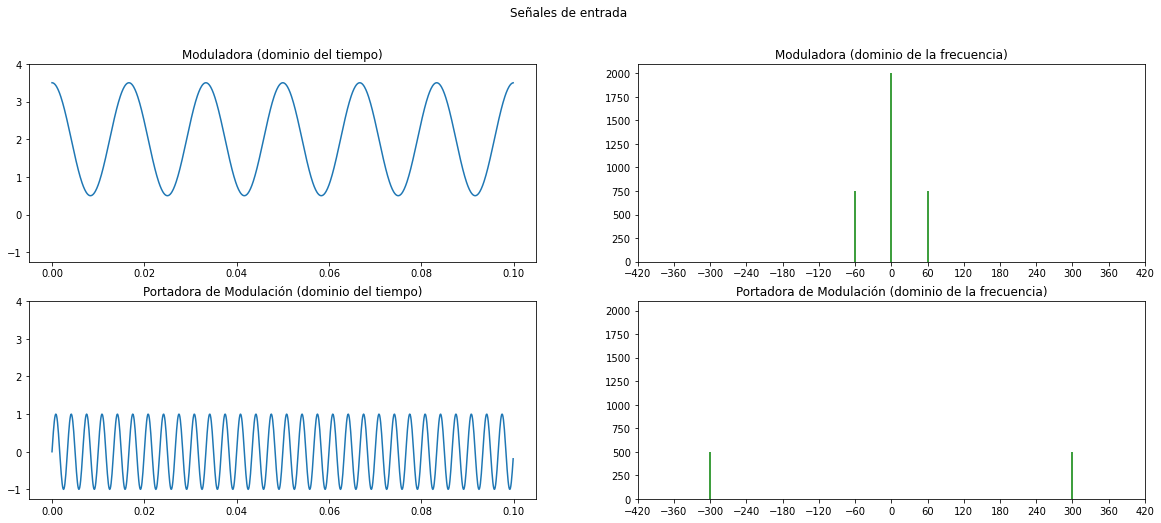

In [5]:
#Señales de entrada

#Portadora de Modulacion
c_Mod = c
Ctf_Mod = Ctf
C_Mod = C

#Plot de las señales de entrada
fig4, axs = plt.subplots(2,2,figsize=(20,8))
fig4.suptitle('Señales de entrada')
axs[0,0].plot(t,m)
axs[0,0].set(ylim=(-1.25,4))
axs[0,0].set_title('Moduladora (dominio del tiempo)')

axs[0,1].set(xlim=(-100,100),ylim=(0,2100),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')

axs[1,0].plot(t,c_Mod)
axs[1,0].set(ylim=(-1.25,4))
axs[1,0].set_title('Portadora de Modulación (dominio del tiempo)')

axs[1,1].set(xlim=(-400,400),ylim=(0,2100),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora de Modulación (dominio de la frecuencia)')
axs[1,1].vlines(Ctf_Mod,0,numpy.abs(C_Mod),color='g')
plt.show()

Se define el delta de frecuencia y el delta de fase para la señal portadora para desmodulacion, tal que el cambio en la frecuencia es de -50 Hz y el cambio en la fase es de 2π/5. Para apreciar mejor los efectos de los cambios en la frecuencia y fase entre la señal portadora de desmodulacion y modulacion, se utilizaran tres señales para la desmodulacion, una con cambios en la frecuencia, otra con cambios en la fase y una con cambios en la fase y la frecuencia.

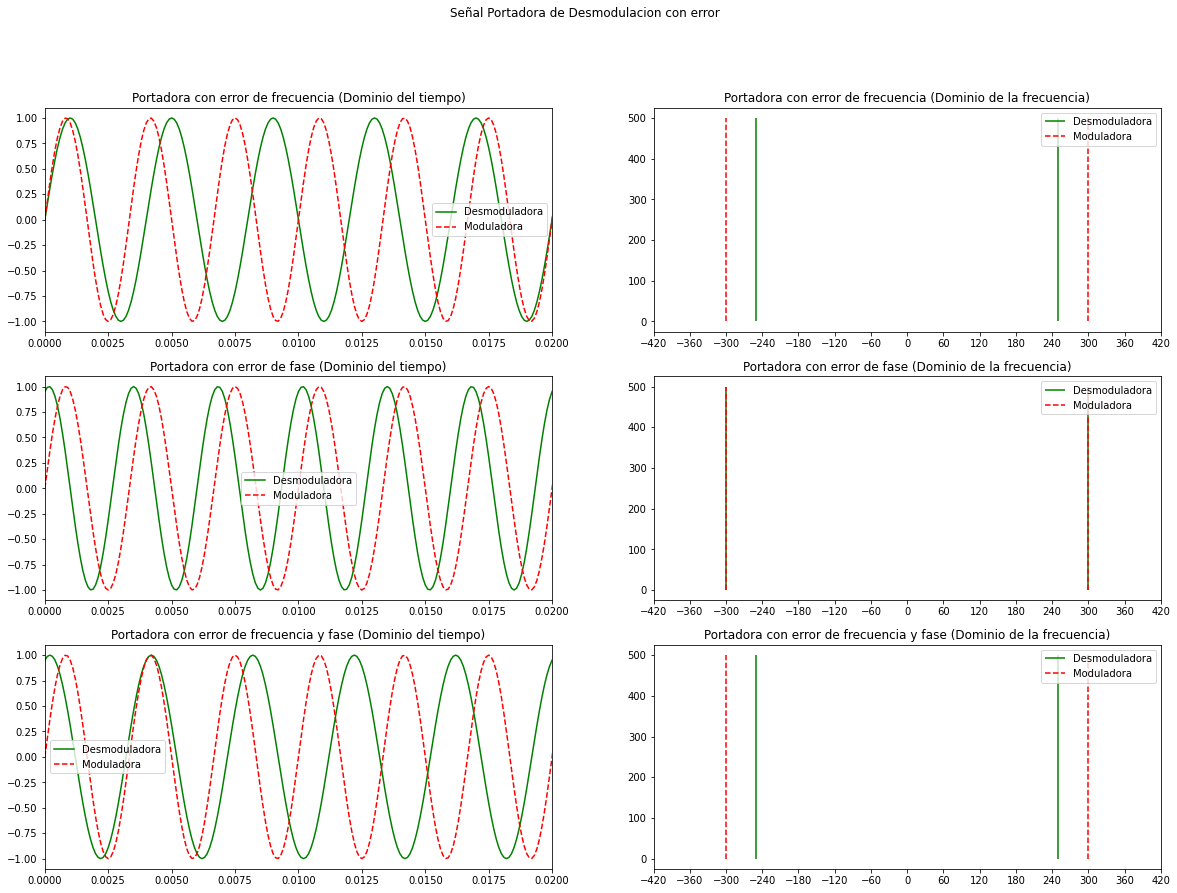

Error de frecuencia: -50.0Hz
Error de fase: 1.2566rad


In [6]:
#dfreqc = float(input('Indique un error de frecuencia'))
dfreqc = float(-50)
#dthetac = float(input('Indique un error de fase'))
dthetac = 2*pi/5

#Protadora con un error de frecuencia
c_DesMod_dfreq = cosenoidal(fc+dfreqc,Ac,0,-pi/2)
Ctf_DesMod_dfreq, C_DesMod_dfreq = plotfft(c_DesMod_dfreq)

#Protadora con un error de fase
c_DesMod_dtheta = cosenoidal(fc,Ac,0,-pi/2+dthetac)
Ctf_DesMod_dtheta, C_DesMod_dtheta = plotfft(c_DesMod_dtheta)

#Protadora con un error de frecuencia y de fase
c_DesMod_dfreq_dtheta = cosenoidal(fc+dfreqc,Ac,0,-pi/2+dthetac)
Ctf_DesMod_dfreq_dtheta, C_DesMod_dfreq_dtheta = plotfft(c_DesMod_dfreq_dtheta)


#Plot de la portadora modificada con errores
fig5, axs = plt.subplots(3,2,figsize=(20,14))
fig5.suptitle('Señal Portadora de Desmodulacion con error')

axs[0,0].plot(t,c_DesMod_dfreq,color='g')
axs[0,0].plot(t,c_Mod,'--',color='r')
axs[0,0].set(xlim=(0,0.02))
axs[0,0].legend(["Desmoduladora", "Moduladora"])
axs[0,0].set_title('Portadora con error de frecuencia (Dominio del tiempo)')

axs[0,1].set(xlim=(-100,100),xticks=(range(-420,480,60)))
axs[0,1].vlines(Ctf_DesMod_dfreq,0,numpy.abs(C_DesMod_dfreq),color='g')
axs[0,1].vlines(Ctf_Mod,0,numpy.abs(C_Mod),color='r',linestyles='dashed')
axs[0,1].set_title('Portadora con error de frecuencia (Dominio de la frecuencia)')
axs[0,1].legend(["Desmoduladora", "Moduladora"])

axs[1,0].plot(t,c_DesMod_dtheta,color='g')
axs[1,0].plot(t,c_Mod,'--',color='r')
axs[1,0].set(xlim=(0,0.02))
axs[1,0].legend(["Desmoduladora", "Moduladora"])
axs[1,0].set_title('Portadora con error de fase (Dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),xticks=(range(-420,480,60)))
axs[1,1].vlines(Ctf_DesMod_dtheta,0,numpy.abs(C_DesMod_dtheta),color='g')
axs[1,1].vlines(Ctf_Mod,0,numpy.abs(C_Mod),color='r',linestyles='dashed')
axs[1,1].set_title('Portadora con error de fase (Dominio de la frecuencia)')
axs[1,1].legend(["Desmoduladora", "Moduladora"])

axs[2,0].plot(t,c_DesMod_dfreq_dtheta,color='g')
axs[2,0].plot(t,c_Mod,'--',color='r')
axs[2,0].set(xlim=(0,0.02))
axs[2,0].legend(["Desmoduladora", "Moduladora"])
axs[2,0].set_title('Portadora con error de frecuencia y fase (Dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),xticks=(range(-420,480,60)))
axs[2,1].vlines(Ctf_DesMod_dfreq_dtheta,0,numpy.abs(C_DesMod_dfreq_dtheta),color='g')
axs[2,1].vlines(Ctf_Mod,0,numpy.abs(C_Mod),color='r',linestyles='dashed')
axs[2,1].set_title('Portadora con error de frecuencia y fase (Dominio de la frecuencia)')
axs[2,1].legend(["Desmoduladora", "Moduladora"])


plt.show()
print('Error de frecuencia: ' + str(dfreqc) + 'Hz')
print('Error de fase: ' + str(round(dthetac,4)) + 'rad')

Rapidamente se aprecia que los cambios en la frecuencia producen un desplazamiento en el domino de la frecuencia, contrario a los cambios en la fase que no producen cambios en el domino de la frecuencia.

### 5. Haga un estudio completo del comportamiento de los efectos de las variaciones de ∆𝜔 y ∆𝜃 en el mensaje recuperado. Compare con los resultados de la Tarea 1, de este mismo documento. Indique claramente los efectos de los errores, por ejemplo, ¿A partir de donde no se puede recuperar el mensaje? 

Se procede a realizar la modulacion AM DSB - SC.

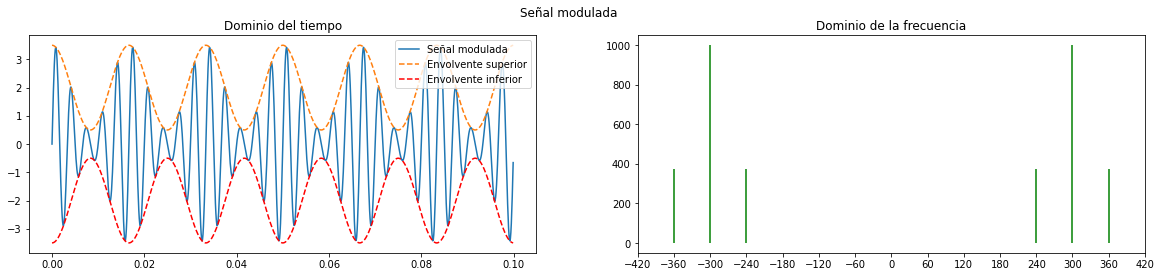

In [7]:
#Modulación AM DSB - SC
s_2 = AMSC(m,c_Mod)
Stf_2, S_2 = plotfft(s_2)

#Plot de la señal modulada
fig6, axs = plt.subplots(1,2,figsize=(20,4))
fig6.suptitle('Señal modulada')
axs[0].plot(t,s_2)
axs[0].plot(t,m,'--')
axs[0].plot(t,-m, '--' , color='r')
axs[0].legend(["Señal modulada", "Envolvente superior", "Envolvente inferior"])
axs[0].set_title('Dominio del tiempo')
#axs[0].grid()
axs[1].set(xlim=(-100,100),xticks=(range(-420,480,60)))
axs[1].vlines(Stf_2,0,numpy.abs(S_2),color='g')
axs[1].set_title('Dominio de la frecuencia')
#axs[1].grid()
plt.show()

Ahora, se pocede a realizar la desmodulacion, primero utilizando una señal portadora para desmodulacion con cambios en la fase, luego la señal con cambios en la frecuencia y finalmente la señal con cambios en la frecuencia y en la fase, todos estos cambios son realizados con respecto a la señal portadora usada para la modulacion.

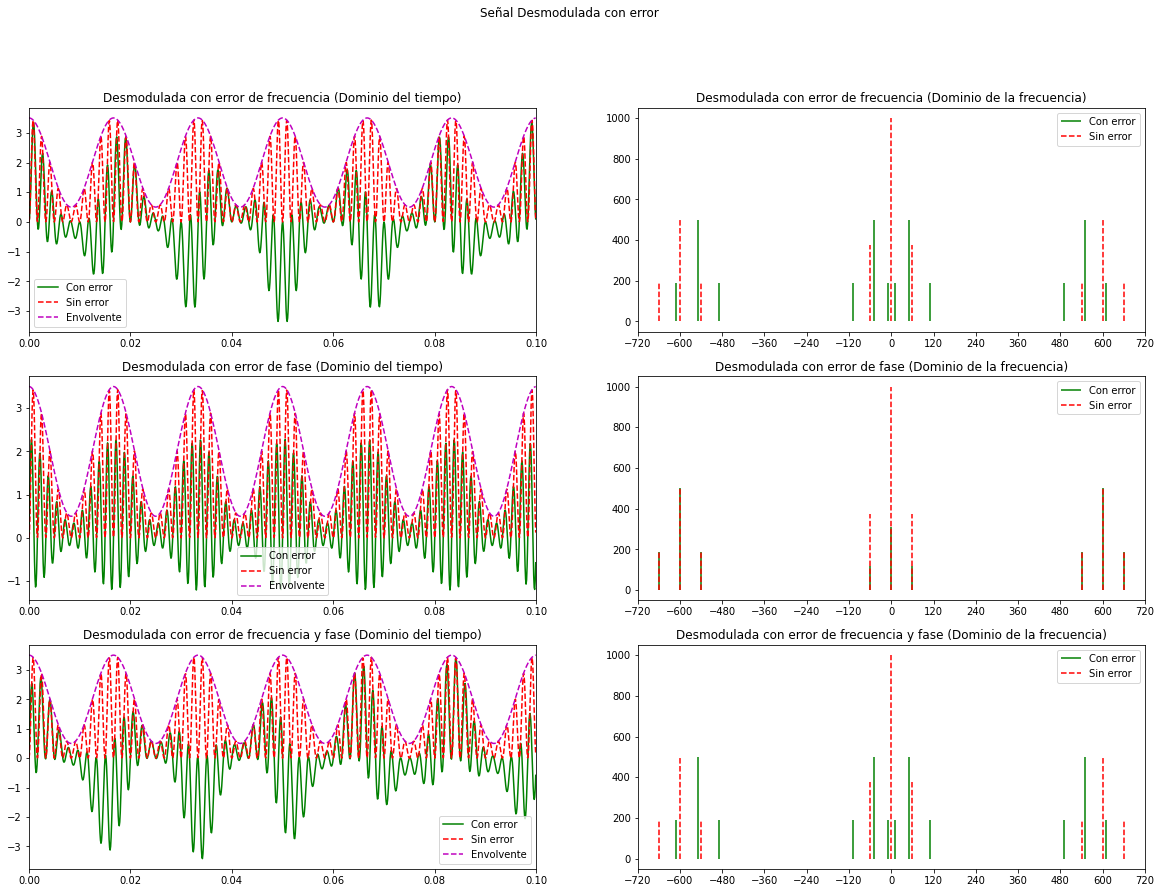

In [8]:
#Desmodulación con errores
sc_dfreq = DemAMSC(s_2,c_DesMod_dfreq)
SCtf_DesMod_dfreq, SC_DesMod_dfreq = plotfft(sc_dfreq)

sc_dtheta = DemAMSC(s_2,c_DesMod_dtheta)
SCtf_DesMod_dtheta, SC_DesMod_dtheta = plotfft(sc_dtheta)

sc_dfreq_dtheta = DemAMSC(s_2,c_DesMod_dfreq_dtheta)
SCtf_DesMod_dfreq_dtheta, SC_DesMod_dfreq_dtheta = plotfft(sc_dfreq_dtheta)

#Plot de la desmodulada con errores
fig7, axs = plt.subplots(3,2,figsize=(20,14))
fig7.suptitle('Señal Desmodulada con error')

axs[0,0].plot(t,sc_dfreq,color='g')
axs[0,0].plot(t,sc,'--',color='r')
axs[0,0].plot(t,m,'--',color='m')
axs[0,0].set(xlim=(0,0.1))
axs[0,0].legend(["Con error", "Sin error",'Envolvente'])
axs[0,0].set_title('Desmodulada con error de frecuencia (Dominio del tiempo)')

axs[0,1].set(xlim=(-100,100),xticks=(range(-720,780,120)))
axs[0,1].vlines(SCtf_DesMod_dfreq,0,numpy.abs(SC_DesMod_dfreq),color='g')
axs[0,1].vlines(SCtf,0,numpy.abs(SC),color='r',linestyles='dashed')
axs[0,1].set_title('Desmodulada con error de frecuencia (Dominio de la frecuencia)')
axs[0,1].legend(["Con error", "Sin error"])

axs[1,0].plot(t,sc_dtheta,color='g')
axs[1,0].plot(t,sc,'--',color='r')
axs[1,0].plot(t,m,'--',color='m')
axs[1,0].set(xlim=(0,0.1))
axs[1,0].legend(["Con error", "Sin error",'Envolvente'])
axs[1,0].set_title('Desmodulada con error de fase (Dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),xticks=(range(-720,780,120)))
axs[1,1].vlines(SCtf_DesMod_dtheta,0,numpy.abs(SC_DesMod_dtheta),color='g')
axs[1,1].vlines(SCtf,0,numpy.abs(SC),color='r',linestyles='dashed')
axs[1,1].set_title('Desmodulada con error de fase (Dominio de la frecuencia)')
axs[1,1].legend(["Con error", "Sin error"])

axs[2,0].plot(t,sc_dfreq_dtheta,color='g')
axs[2,0].plot(t,sc,'--',color='r')
axs[2,0].plot(t,m,'--',color='m')
axs[2,0].set(xlim=(0,0.1))
axs[2,0].legend(["Con error", "Sin error",'Envolvente'])
axs[2,0].set_title('Desmodulada con error de frecuencia y fase (Dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),xticks=(range(-720,780,120)))
axs[2,1].vlines(SCtf_DesMod_dfreq_dtheta,0,numpy.abs(SC_DesMod_dfreq_dtheta),color='g')
axs[2,1].vlines(SCtf,0,numpy.abs(SC),color='r',linestyles='dashed')
axs[2,1].set_title('Desmodulada con error de frecuencia y fase (Dominio de la frecuencia)')
axs[2,1].legend(["Con error", "Sin error"])

plt.show()


A primera vista se puede deducir que el mensaje original se pierde, en presencia de un error de frecuencia, esto debido a que la señal desmodulada ya no contiene las frecuencias del mensaje original. A diferencia del error producto de un cambio en la fase, donde se conservan las frecuencias, mas no las magnitudes.

Nuevamente, se aplica un filtro pasabajas con frecuencia de corte de 100 Hz y se observan los resultados y cambios producto de una señal portadora para desmodulacion diferente de la usada para modulacion.

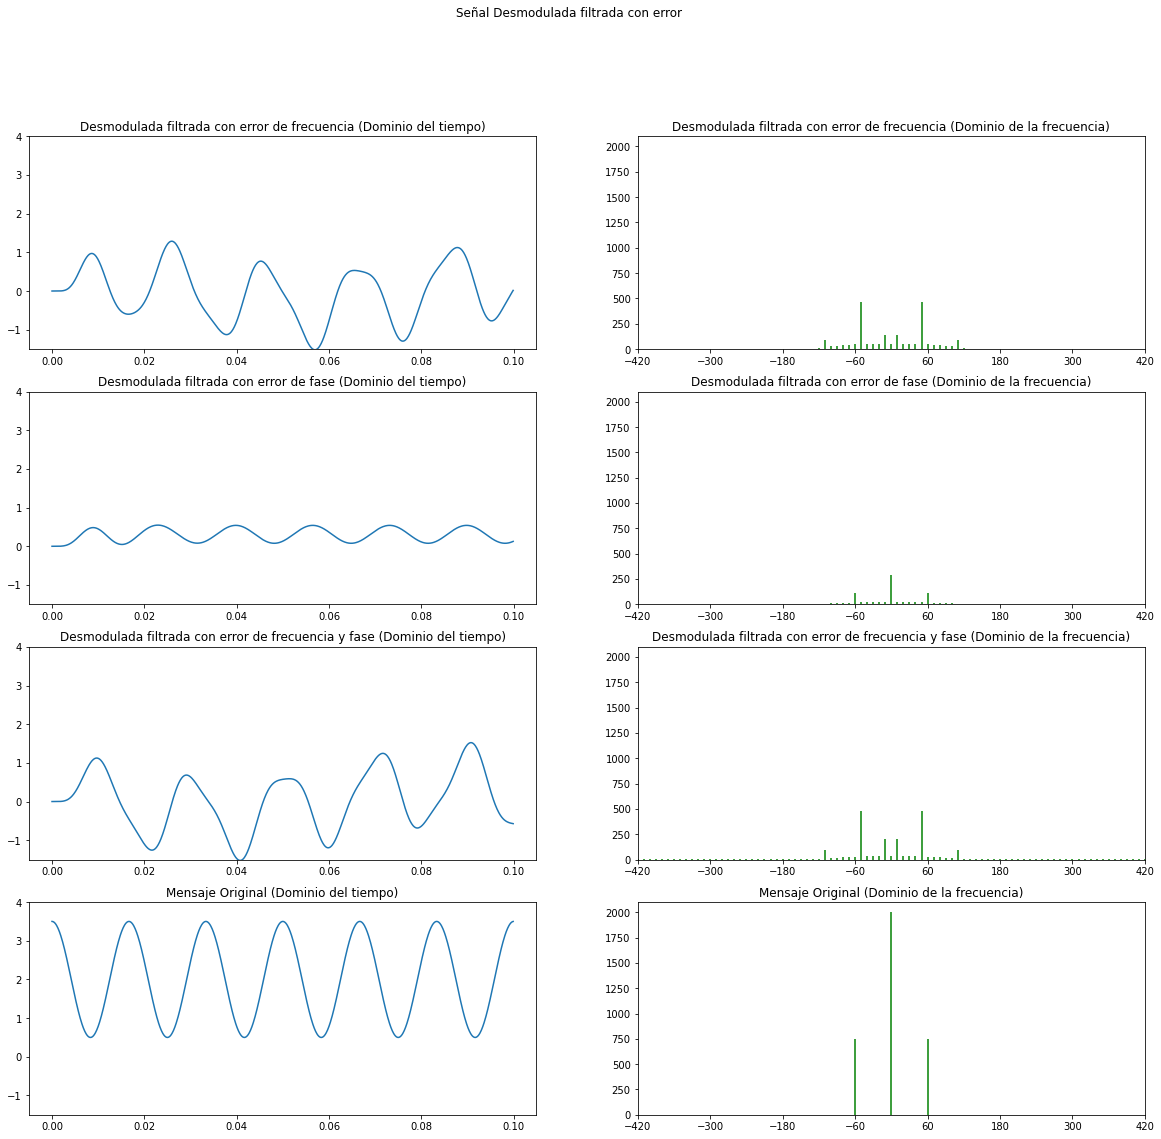

In [9]:
#Filtrado
cutoff = 100

md_dfreq = butter_lowpass_filter(sc_dfreq, cutoff, fs, order)
MDtf_DesMod_dfreq, MD_DesMod_dfreq = plotfft(md_dfreq)

md_dtheta = butter_lowpass_filter(sc_dtheta, cutoff, fs, order)
MDtf_DesMod_dtheta, MD_DesMod_dtheta = plotfft(md_dtheta)

md_dfreq_dtheta = butter_lowpass_filter(sc_dfreq_dtheta, cutoff, fs, order)
MDtf_DesMod_dfreq_dtheta, MD_DesMod_dfreq_dtheta = plotfft(md_dfreq_dtheta)


#Plot de la desmodulada filtrada con errores
fig8, axs = plt.subplots(4,2,figsize=(20,18))
fig8.suptitle('Señal Desmodulada filtrada con error')

axs[0,0].plot(t,md_dfreq)
axs[0,0].set(ylim=(-1.5,4))
axs[0,0].set_title('Desmodulada filtrada con error de frecuencia (Dominio del tiempo)')

axs[0,1].set(xlim=(-100,100),ylim=(0,2100),xticks=(range(-420,480,120)))
axs[0,1].vlines(MDtf_DesMod_dfreq,0,numpy.abs(MD_DesMod_dfreq),color='g')
axs[0,1].set_title('Desmodulada filtrada con error de frecuencia (Dominio de la frecuencia)')

axs[1,0].plot(t,md_dtheta)
axs[1,0].set(ylim=(-1.5,4))
axs[1,0].set_title('Desmodulada filtrada con error de fase (Dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),ylim=(0,2100),xticks=(range(-420,480,120)))
axs[1,1].vlines(MDtf_DesMod_dtheta,0,numpy.abs(MD_DesMod_dtheta),color='g')
axs[1,1].set_title('Desmodulada filtrada con error de fase (Dominio de la frecuencia)')

axs[2,0].plot(t,md_dfreq_dtheta)
axs[2,0].set(ylim=(-1.5,4))
axs[2,0].set_title('Desmodulada filtrada con error de frecuencia y fase (Dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,2100),xticks=(range(-420,480,120)))
axs[2,1].vlines(MDtf_DesMod_dfreq_dtheta,0,numpy.abs(MD_DesMod_dfreq_dtheta),color='g')
axs[2,1].set_title('Desmodulada filtrada con error de frecuencia y fase (Dominio de la frecuencia)')

axs[3,0].plot(t,m)
axs[3,0].set(ylim=(-1.5,4))
axs[3,0].set_title('Mensaje Original (Dominio del tiempo)')

axs[3,1].set(xlim=(-100,100),ylim=(0,2100),xticks=(range(-420,480,120)))
axs[3,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[3,1].set_title('Mensaje Original (Dominio de la frecuencia)')


plt.show()



De estos resultados se rescatan los siguientes puntos:
1. Para errores en la frecuencia el mensaje se pierde, esto se aprecia en ambos dominos; en el tiempo la señal se deforma completamente y en la frecuencia no se aprecian las componentes en las frecuencias del mensaje original.
2. Los errores en la fase producen cambios de amplitud en el mensaje original, sin embargo se aprecia que las frecuencias se mantienen, lo que puede ser corregido mediante el acondicionamiento de la señal obtenida.
3. Los errores producto del filtrado se conservan.

Podemos concluir que el mensaje original se puede recuperar cuando no haya error de frecuencia y el error de fase sea lo mas pequeño posible. Por lo tanto, tal y como se estudia en la teoria, se comprueba que para un proceso de modulacion AM DSB-SC es altamente recomendado que las señal portadora para modulacion y desmodulacion sean iguales, que esten sincronizadas. Asi como se recomienda utilizar un filtro de alta calidad para disminuir al maximo distorsiones producto del filtrado.

## TAREA #3

**Construir un modulador básico AM de tipo DSC-LC, considerando únicamente la etapa de modulación:**


#### 1. Se recomienda crear una función para la modulación. 
Se usa la misma creada para la tarea 1

#### 2. Para el experimento, considere una señal de tono 𝑚(𝑡) ó 𝑓(𝑡) = cos (2𝜋𝑓௠𝑡), de forma que SI SE INCURRA en sobre-modulación. 
Se muestra junto con la 3

#### 3. Grafique todas las funciones y salidas involucradas, esto es, 𝑚(𝑡), 𝑐, 𝑠(𝑡), tanto en el tiempo como en la frecuencia. Sea ordenado en la forma en que lo presente en la notebook. Describa lo que observa en cada una de ellas. 

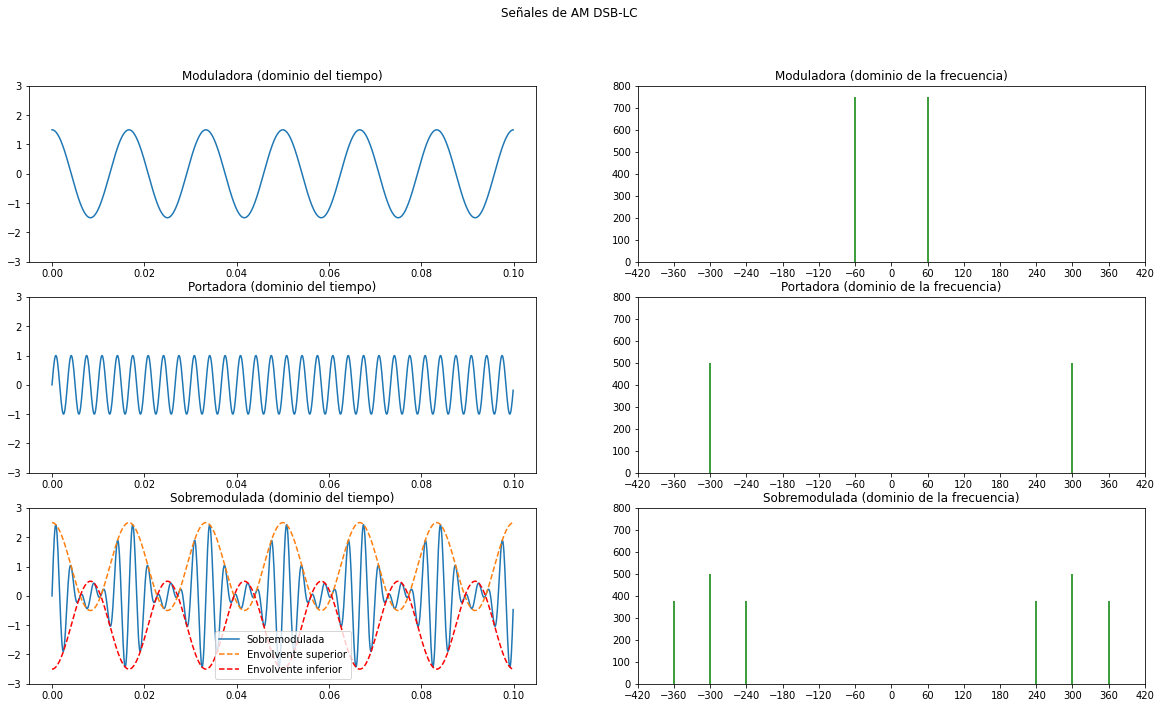

Sensibilidad de amplitud ka: 1
Factor de modulación μ: 1.5
Porcentaje de modulación: 150.0%


In [10]:
#Sobremodulación AM DSB-LC

#Señales de entrada
#Señal de banda base
fm = 60
Am = 1.5
Off = 0
m = cosenoidal(fm,Am,Off)
Mtf, M = plotfft(m)

#Señal portadora
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)

#Sobremodulación AM DSB-LC
#Sensibilidad de amplitud
ka = 1
s = AMLC(m,c,ka)
Stf, S = plotfft(s)

#Plot de las señales
fig9, axs = plt.subplots(3,2,figsize=(20,11))
fig9.suptitle('Señales de AM DSB-LC')

axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,0].set(ylim=(-3,3))

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')

axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,0].set(ylim=(-3,3))

axs[1,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')

axs[2,0].plot(t,s)
axs[2,0].plot(t,(1+ka*m), '--' )
axs[2,0].plot(t,-(1+ka*m), '--' , color='r')
axs[2,0].set_title('Sobremodulada (dominio del tiempo)')
axs[2,0].set(ylim=(-3,3))
axs[2,0].legend(["Sobremodulada", "Envolvente superior","Envolvente inferior"])

axs[2,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[2,1].set_title('Sobremodulada (dominio de la frecuencia)')
axs[2,1].vlines(Stf,0,numpy.abs(S),color='g')

plt.show()

print('Sensibilidad de amplitud ka: ' + str(ka))
print('Factor de modulación \u03BC: ' + str(round(ka*Am,2)))
print('Porcentaje de modulación: ' + str(round(100*ka*Am,1)) + '%')

#### 4. Realice un análisis completo de lo ocurrido en cada parte funcional del sistema de modulación AM DSB-SL, basado en las gráficas obtenidas.

**Caso de estudio 1:**
Se tiene una onda moduladora de 60Hz con una amplitud de 1.5 la cual puede observarse en la figura de arriba a la izquierda y a su derecha puede observarse su equivalente en el dominio de la frecuencia, esta se trasmite por medio de una onda portadora de 300Hz y una amplitud de 1 la cual se puede ver en la segunda fila de figuras. Finalmente en la tercera fila se puede observar la onda modulada la cual es modulada con una sensibilidad a la amplitud de 1 lo que genera un factor de modulacion de 1.5, siendo este mayor al limite de lo recomendado (μ = 1), debido a esto se puede observar una sobremodulacion como se ve en los resultados de la prueba anterior, llegando a un 150% de modulación.

#### 5. Realice un estudio robusto del efecto del factor de modulación *𝜇 = 𝑘Am* durante el proceso y en particular en la señal resultante de la modulación, esto es, en la señal modulada 𝑠(𝑡), se recomienda la generación y análisis de experimentos para diversos valores de 𝜇. 

##### **Variaciones en el Ka**

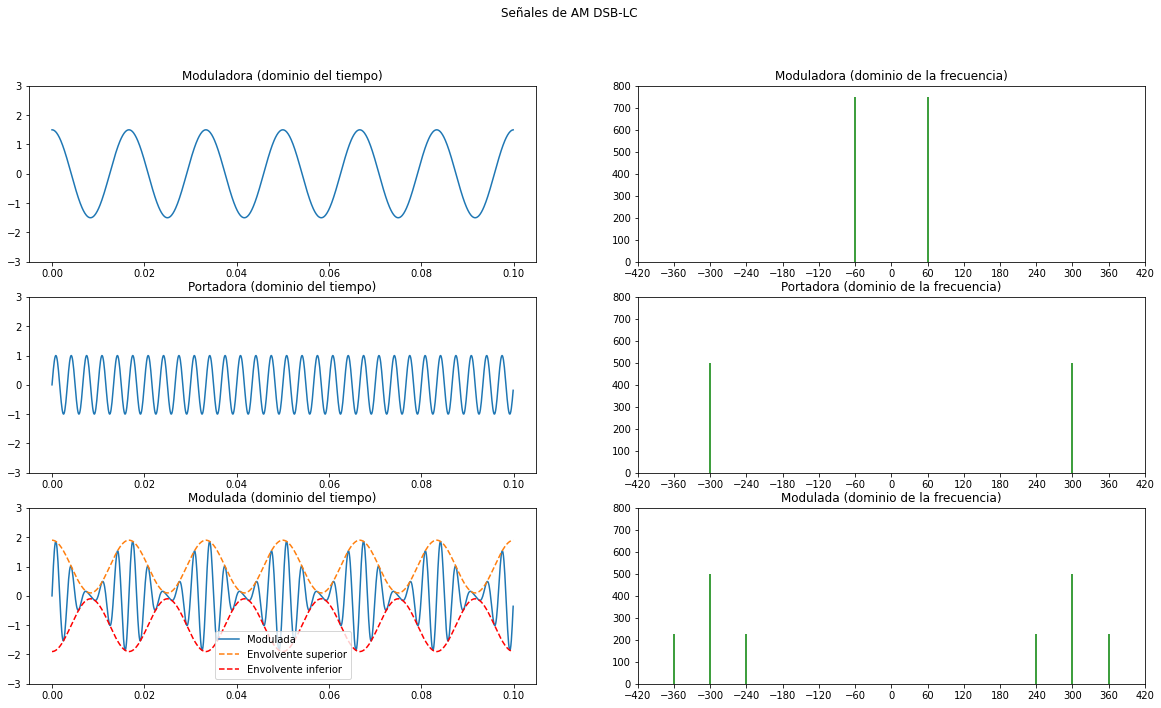

Sensibilidad de amplitud ka: 0.6
Factor de modulación μ: 0.9
Porcentaje de modulación: 90.0%


In [11]:
#Modulación AM DSB-LC
#Sensibilidad de amplitud
ka = 0.6
s = AMLC(m,c,ka)
Stf, S = plotfft(s)

#Plot de las señales
fig9, axs = plt.subplots(3,2,figsize=(20,11))
fig9.suptitle('Señales de AM DSB-LC')

axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,0].set(ylim=(-3,3))

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')

axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,0].set(ylim=(-3,3))

axs[1,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')

axs[2,0].plot(t,s)
axs[2,0].plot(t,(1+ka*m), '--' )
axs[2,0].plot(t,-(1+ka*m), '--' , color='r')
axs[2,0].set_title('Modulada (dominio del tiempo)')
axs[2,0].set(ylim=(-3,3))
axs[2,0].legend(["Modulada", "Envolvente superior","Envolvente inferior"])

axs[2,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[2,1].set_title('Modulada (dominio de la frecuencia)')
axs[2,1].vlines(Stf,0,numpy.abs(S),color='g')

plt.show()

print('Sensibilidad de amplitud ka: ' + str(ka))
print('Factor de modulación \u03BC: ' + str(round(ka*Am,2)))
print('Porcentaje de modulación: ' + str(round(100*ka*Am,1)) + '%')

**Caso de estudio 2:** Se disminuye la sensibilidad a la amplitud para de la misma manera disminuir el factor de modulacion llagando este a 0.9, obteniendo de esta forma una senal sin sobremodulacion.

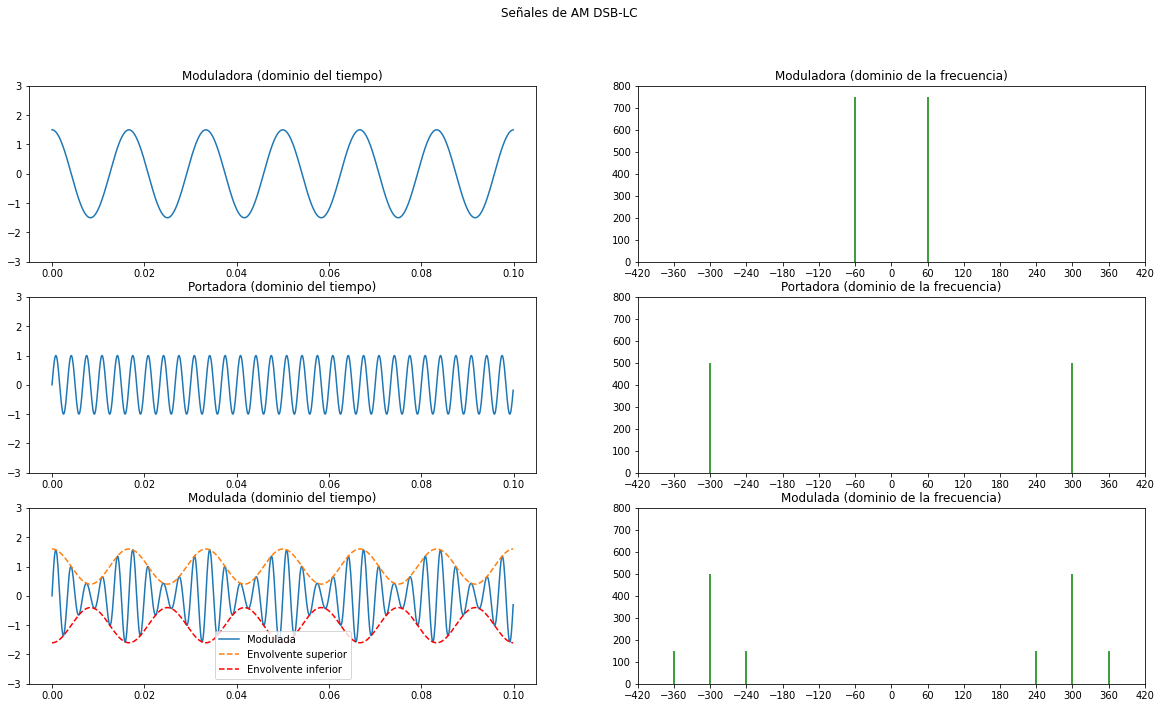

Sensibilidad de amplitud ka: 0.4
Factor de modulación μ: 0.6
Porcentaje de modulación: 60.0%


In [12]:
#Modulación AM DSB-LC
#Sensibilidad de amplitud
ka = 0.4
s = AMLC(m,c,ka)
Stf, S = plotfft(s)

#Plot de las señales
fig9, axs = plt.subplots(3,2,figsize=(20,11))
fig9.suptitle('Señales de AM DSB-LC')

axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,0].set(ylim=(-3,3))

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')

axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,0].set(ylim=(-3,3))

axs[1,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')

axs[2,0].plot(t,s)
axs[2,0].plot(t,(1+ka*m), '--' )
axs[2,0].plot(t,-(1+ka*m), '--' , color='r')
axs[2,0].set_title('Modulada (dominio del tiempo)')
axs[2,0].set(ylim=(-3,3))
axs[2,0].legend(["Modulada", "Envolvente superior","Envolvente inferior"])

axs[2,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[2,1].set_title('Modulada (dominio de la frecuencia)')
axs[2,1].vlines(Stf,0,numpy.abs(S),color='g')

plt.show()

print('Sensibilidad de amplitud ka: ' + str(ka))
print('Factor de modulación \u03BC: ' + str(round(ka*Am,2)))
print('Porcentaje de modulación: ' + str(round(100*ka*Am,1)) + '%')

**Caso de estudio 3:** Se disminuye aún más la sensibilidad a la amplitud para observar el comportamiento de la señal resultante la cual como se espera presenta menos modulación que en el caso anterior.

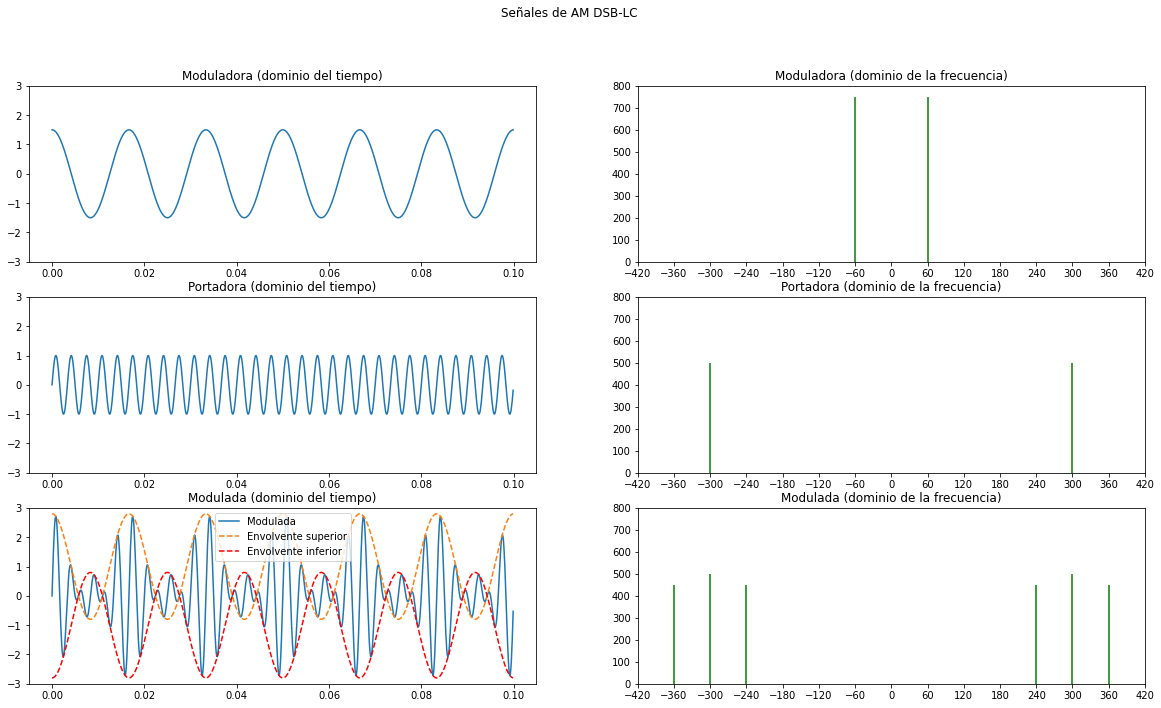

Sensibilidad de amplitud ka: 1.2
Factor de modulación μ: 1.8
Porcentaje de modulación: 180.0%


In [13]:
#Modulación AM DSB-LC
#Sensibilidad de amplitud
ka = 1.2
s = AMLC(m,c,ka)
Stf, S = plotfft(s)

#Plot de las señales
fig9, axs = plt.subplots(3,2,figsize=(20,11))
fig9.suptitle('Señales de AM DSB-LC')

axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,0].set(ylim=(-3,3))

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')

axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,0].set(ylim=(-3,3))

axs[1,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')

axs[2,0].plot(t,s)
axs[2,0].plot(t,(1+ka*m), '--' )
axs[2,0].plot(t,-(1+ka*m), '--' , color='r')
axs[2,0].set_title('Modulada (dominio del tiempo)')
axs[2,0].set(ylim=(-3,3))
axs[2,0].legend(["Modulada", "Envolvente superior","Envolvente inferior"])

axs[2,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[2,1].set_title('Modulada (dominio de la frecuencia)')
axs[2,1].vlines(Stf,0,numpy.abs(S),color='g')

plt.show()

print('Sensibilidad de amplitud ka: ' + str(ka))
print('Factor de modulación \u03BC: ' + str(round(ka*Am,2)))
print('Porcentaje de modulación: ' + str(round(100*ka*Am,1)) + '%')

**Caso de estudio 4:** Se prueba ahora con una sensibilidad a la amplitud ligeramente mayor la cual provoca una sobremodulación incluso mayor a la del caso de estudio 1.

##### **Variaciones de Am**

Se pasa a variar la amplitud de la señal moduladora para observar su efecto en la modulación.

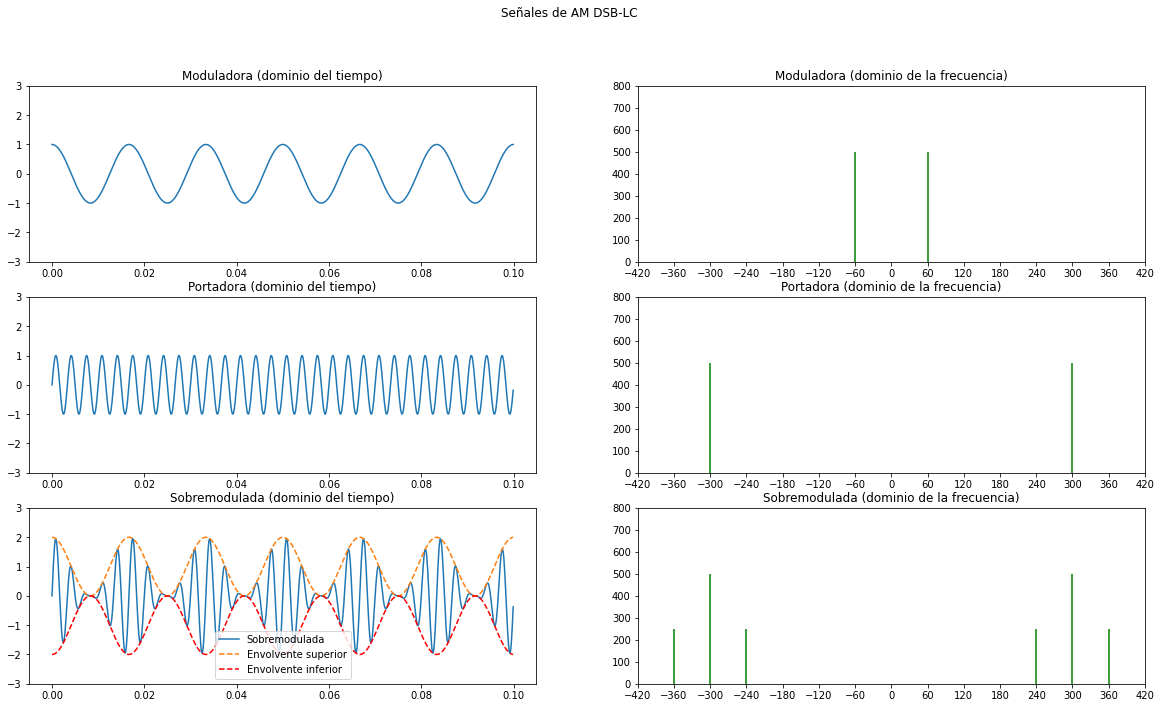

Sensibilidad de amplitud ka: 1
Factor de modulación μ: 1
Porcentaje de modulación: 100%


In [14]:
#Sobremodulación AM DSB-LC

#Señales de entrada
#Señal de banda base
fm = 60
Am = 1
Off = 0
m = cosenoidal(fm,Am,Off)
Mtf, M = plotfft(m)

#Señal portadora
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)

#Sobremodulación AM DSB-LC
#Sensibilidad de amplitud
ka = 1
s = AMLC(m,c,ka)
Stf, S = plotfft(s)

#Plot de las señales
fig9, axs = plt.subplots(3,2,figsize=(20,11))
fig9.suptitle('Señales de AM DSB-LC')

axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,0].set(ylim=(-3,3))

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')

axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,0].set(ylim=(-3,3))

axs[1,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')

axs[2,0].plot(t,s)
axs[2,0].plot(t,(1+ka*m), '--' )
axs[2,0].plot(t,-(1+ka*m), '--' , color='r')
axs[2,0].set_title('Sobremodulada (dominio del tiempo)')
axs[2,0].set(ylim=(-3,3))
axs[2,0].legend(["Sobremodulada", "Envolvente superior","Envolvente inferior"])

axs[2,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[2,1].set_title('Sobremodulada (dominio de la frecuencia)')
axs[2,1].vlines(Stf,0,numpy.abs(S),color='g')

plt.show()

print('Sensibilidad de amplitud ka: ' + str(ka))
print('Factor de modulación \u03BC: ' + str(round(ka*Am,2)))
print('Porcentaje de modulación: ' + str(round(100*ka*Am,1)) + '%')

**Caso de estudio 5:** Disminuir el factor Am a 1 provoca a su vez una disminución en el factor de modulación, estando ahora en el limite de modulación.

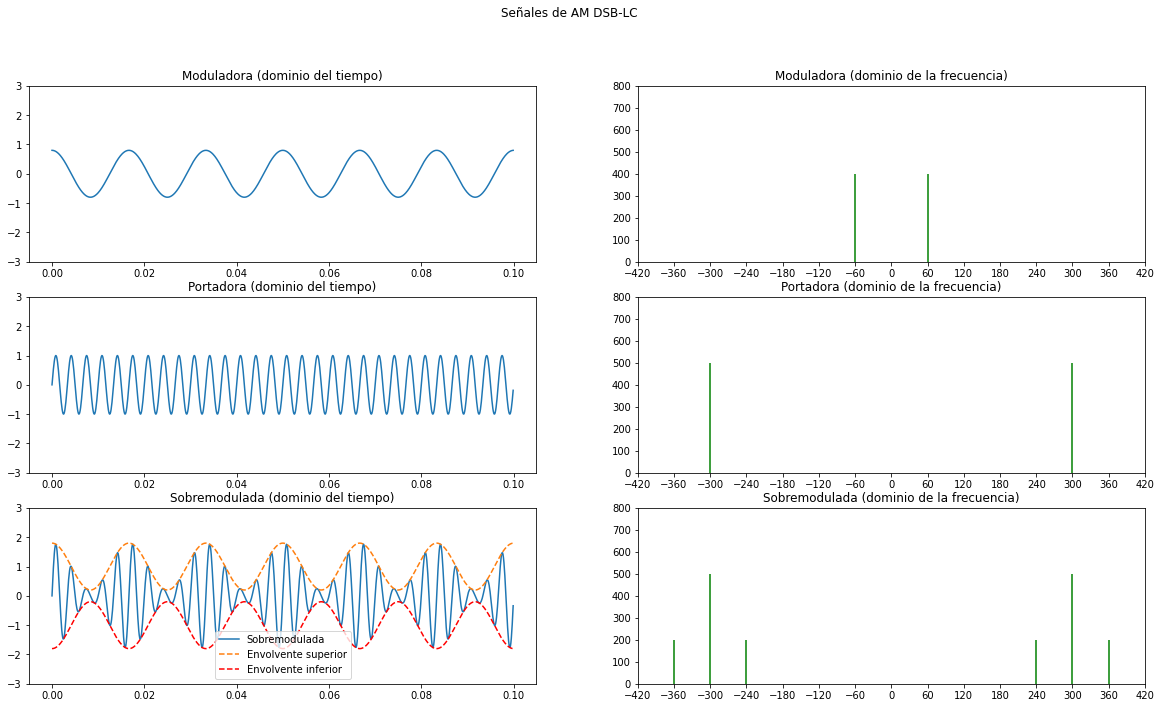

Sensibilidad de amplitud ka: 1
Factor de modulación μ: 0.8
Porcentaje de modulación: 80.0%


In [15]:
#Sobremodulación AM DSB-LC

#Señales de entrada
#Señal de banda base
fm = 60
Am = 0.8
Off = 0
m = cosenoidal(fm,Am,Off)
Mtf, M = plotfft(m)

#Señal portadora
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)

#Sobremodulación AM DSB-LC
#Sensibilidad de amplitud
ka = 1
s = AMLC(m,c,ka)
Stf, S = plotfft(s)

#Plot de las señales
fig9, axs = plt.subplots(3,2,figsize=(20,11))
fig9.suptitle('Señales de AM DSB-LC')

axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,0].set(ylim=(-3,3))

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')

axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,0].set(ylim=(-3,3))

axs[1,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')

axs[2,0].plot(t,s)
axs[2,0].plot(t,(1+ka*m), '--' )
axs[2,0].plot(t,-(1+ka*m), '--' , color='r')
axs[2,0].set_title('Sobremodulada (dominio del tiempo)')
axs[2,0].set(ylim=(-3,3))
axs[2,0].legend(["Sobremodulada", "Envolvente superior","Envolvente inferior"])

axs[2,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[2,1].set_title('Sobremodulada (dominio de la frecuencia)')
axs[2,1].vlines(Stf,0,numpy.abs(S),color='g')

plt.show()

print('Sensibilidad de amplitud ka: ' + str(ka))
print('Factor de modulación \u03BC: ' + str(round(ka*Am,2)))
print('Porcentaje de modulación: ' + str(round(100*ka*Am,1)) + '%')

**Caso de estudio 6:** Al igual que al variar la sensibilidad de amplitud, mientras más se disminuye la amplitud de la señal moduladora más disminuye lel porcentaje de modulación.

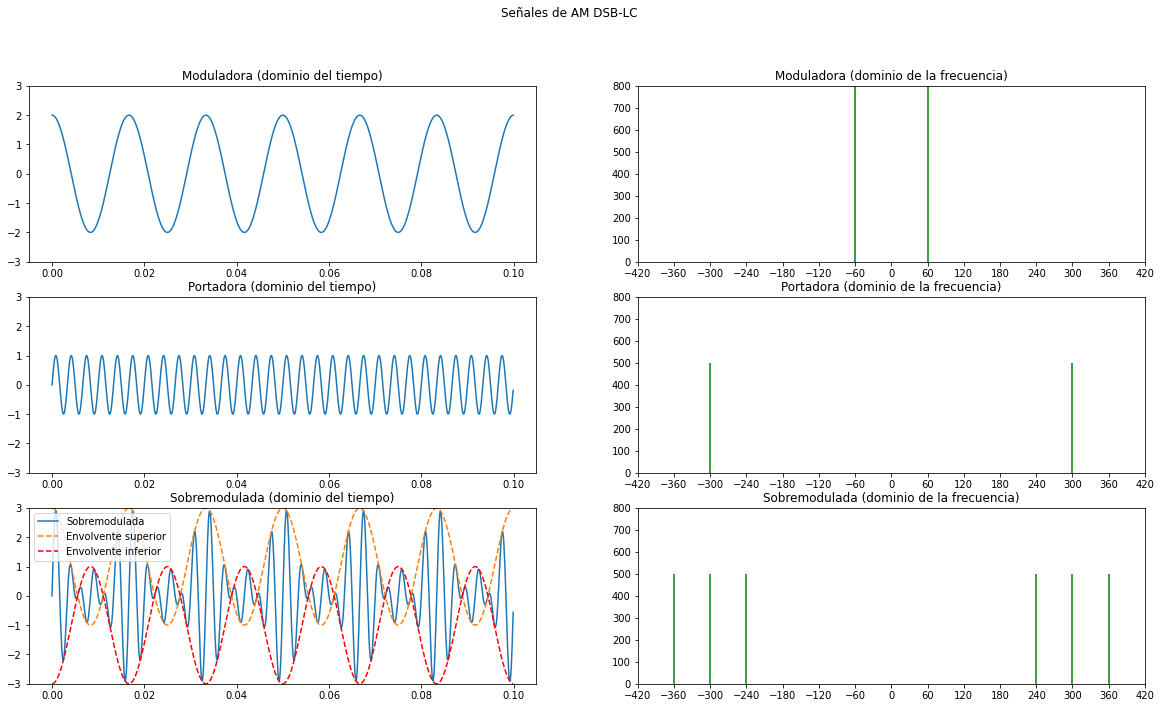

Sensibilidad de amplitud ka: 1
Factor de modulación μ: 2.0
Porcentaje de modulación: 200.0%


In [16]:
#Sobremodulación AM DSB-LC

#Señales de entrada
#Señal de banda base
fm = 60
Am = 2.0
Off = 0
m = cosenoidal(fm,Am,Off)
Mtf, M = plotfft(m)

#Señal portadora
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)

#Sobremodulación AM DSB-LC
#Sensibilidad de amplitud
ka = 1
s = AMLC(m,c,ka)
Stf, S = plotfft(s)

#Plot de las señales
fig9, axs = plt.subplots(3,2,figsize=(20,11))
fig9.suptitle('Señales de AM DSB-LC')

axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,0].set(ylim=(-3,3))

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')

axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,0].set(ylim=(-3,3))

axs[1,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')

axs[2,0].plot(t,s)
axs[2,0].plot(t,(1+ka*m), '--' )
axs[2,0].plot(t,-(1+ka*m), '--' , color='r')
axs[2,0].set_title('Sobremodulada (dominio del tiempo)')
axs[2,0].set(ylim=(-3,3))
axs[2,0].legend(["Sobremodulada", "Envolvente superior","Envolvente inferior"])

axs[2,1].set(xlim=(-400,400),ylim=(0,800),xticks=(range(-420,480,60)))
axs[2,1].set_title('Sobremodulada (dominio de la frecuencia)')
axs[2,1].vlines(Stf,0,numpy.abs(S),color='g')

plt.show()

print('Sensibilidad de amplitud ka: ' + str(ka))
print('Factor de modulación \u03BC: ' + str(round(ka*Am,2)))
print('Porcentaje de modulación: ' + str(round(100*ka*Am,1)) + '%')

**Caso de estudio 7:** Finalmente, el aumentar el amplitud de la señal moduladora aumenta a su vez el factor de modulación obteniendo de esta forma una señar muy sobremodulada.

#### 6. Determine y justifique adecuadamente en que valor de *𝜇 = 𝑘Am* es posible corregir de manera óptima el efecto de la sobre-modulación, presente las curvas que justifiquen adecuadamente su análisis.

El rango normal de operación para un modulador Am es entre el rango de 0 y 100% de modulación siendo este ultimo el valor máximo que se puede conseguir si se deseara recuperar la información de la señal con un demodulador el cual posea un detector de envolvente el cual no tolere la distorción. Debido a esto los valores usados en los casos 2, 3, 5 y 6 serían aceptables.